In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from pandas_profiling import ProfileReport

# 0. Loading our Data


In [2]:
data = pd.read_csv('../Data/donors.csv')

In [3]:
data

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,2016-01-01,ASE,1,AK,99504,,,NaN,0,...,25.000000,184568,0,L,1,G,X,X,X,C
95408,95408,2016-01-01,DCD,1,TX,77379,,,1970-01-01,0,...,20.000000,122706,1,L,1,F,X,X,X,A
95409,95409,2015-01-01,MBC,1,MI,48910,,,1958-01-01,0,...,8.285714,189641,1,L,3,E,X,X,X,B
95410,95410,2006-01-01,PRV,0,CA,91320,,,1960-05-01,0,...,12.146341,4693,1,L,4,F,X,X,X,A


# 1. Categorising variable names

In [4]:
general_columns = ['ODATEDW',
                   'OSOURCE',
                   'TCODE',
                   'STATE',
                   'ZIP',
                   'MAILCODE',
                   'PVASTATE',
                   'DOB',
                   'NOEXCH',
                   'RECINHSE',
                   'RECP3',
                   'RECPGVG',
                   'RECSWEEP',
                   'MDMAUD',
                   'DOMAIN',
                   'HOMEOWNR',
                   'CHILD03',
                   'CHILD07',
                   'CHILD12',
                   'CHILD18',
                   'NUMCHLD',
                   'INCOME',
                   'GENDER',
                   'WEALTH1',
                   'HIT']

In [5]:
other_mail_offers = ['MBCRAFT',
'MBGARDEN',
'MBBOOKS',
'MBCOLECT',
'MAGFAML',
'MAGFEM',
'MAGMALE',
'PUBGARDN',
'PUBCULIN',
'PUBHLTH',
'PUBDOITY',
'PUBNEWFN',
'PUBPHOTO',
'PUBOPP']

In [6]:
military_context = [
'DATASRCE',
'MALEMILI',
'MALEVET',
'VIETVETS',
'WWIIVETS',
'LOCALGOV',
'STATEGOV',
'FEDGOV',
'SOLP3',
'SOLIH',
'MAJOR',
'WEALTH2',
'GEOCODE'
]

In [7]:
lifestyle_interests = [
'COLLECT1',
'VETERANS',
'BIBLE',
'CATLG',
'HOMEE',
'PETS',
'CDPLAY',
'STEREO',
'PCOWNERS',
'PHOTO',
'CRAFTS',
'FISHER',
'GARDENIN',
'BOATS',
'WALKER',
'KIDSTUFF',
'CARDS',
'PLATES',
'LIFESRC']

In [8]:
population = [
'POP901',
'POP902',
'POP903',
'POP90C1',
'POP90C2',
'POP90C3',
'POP90C4',
'POP90C5']

ethnicity = ['ETH1',
'ETH2',
'ETH3',
'ETH4',
'ETH5',
'ETH6',
'ETH7',
'ETH8',
'ETH9',
'ETH10',
'ETH11',
'ETH12',
'ETH13',
'ETH14',
'ETH15',
'ETH16',
'ETHC1',
'ETHC2',
'ETHC3',
'ETHC4',
'ETHC5',
'ETHC6'
            ]


age = [
'AGE901',
'AGE902',
'AGE903',
'AGE904',
'AGE905',
'AGE906',
'AGE907',
'CHIL1',
'CHIL2',
'CHIL3',
'AGEC1',
'AGEC2',
'AGEC3',
'AGEC4',
'AGEC5',
'AGEC6',
'AGEC7',
'CHILC1',
'CHILC2',
'CHILC3',
'CHILC4',
'CHILC5',
'AC1',
'AC2',
]

households = [
'HHN1',
'HHN2',
'HHN3',
'HHN4',
'HHN5',
'HHN6',
'HHP1',
'HHP2'
]

marriage = [
'MARR1',
'MARR2',
'MARR3',
'MARR4'
]

structure = [
'DW1',
'DW2',
'DW3',
'DW4',
'DW5',
'DW6',
'DW7',
'DW8'
]

home_value = [
'HV1',
'HV2',
'HV3',
'HV4',
'HVP1',
'HVP2',
'HVP3',
'HVP4',
'HVP5',
'HVP6',
]

housing_units = [
'HU1',
'HU2',
'HU3',
'HU4',
'HU5',
'HUR1',
'HUR2',
'RHP1',
'RHP2',
'RHP3',
'RHP4',
'HUPA1',
'HUPA2',
'HUPA3'
]

families = [
'HHD1',
'HHD2',
'HHD3',
'HHD4',
'HHD5',
'HHD6',
'HHD7',
'HHD8',
'HHD9',
'HHD10',
'HHD11',
'HHD12'
]

renters = [
'HUPA4',
'HUPA5',
'HUPA6',
'HUPA7',
'RP1',
'RP2',
'RP3',
'RP4'  
]

income = [
'ADI', # code that measures "disadvantage" 1- lowest, 100-highest. 
'IC1',
'IC2',
'IC3',
'IC4',
'IC5',
'IC6',
'IC7',
'IC8',
'IC9',
'IC10',
'IC11',
'IC12',
'IC13',
'IC14',
'IC15',
'IC16',
'IC17',
'IC18',
'IC19',
'IC20',
'IC21',
'IC22',
'IC23',
'HHAS1',
'HHAS2',
'HHAS3',
'HHAS4',   
]

mobility = [
    'MC1',
    'MC2',
    'MC3',
    'PEC1',
    'PEC2',
]

transportation = [
'TPE1',
'TPE2',
'TPE3',
'TPE4',
'TPE5',
'TPE6',
'TPE7',
'TPE8',
'TPE9',
'TPE10',
'TPE11',
'TPE12',
'TPE13',       
]

labor_force = [
'LFC1',
'LFC2',
'LFC3',
'LFC4',
'LFC5',
'LFC6',
'LFC7',
'LFC8',
'LFC9',
'LFC10'
]

occupation = [
'OCC1',
'OCC2',
'OCC3',
'OCC4',
'OCC5',
'OCC6',
'OCC7',
'OCC8',
'OCC9',
'OCC10',
'OCC11',
'OCC12',
'OCC13',
]

employment = [
'EIC1',
'EIC2',
'EIC3',
'EIC4',
'EIC5',
'EIC6',
'EIC7',
'EIC8',
'EIC9',
'EIC10',
'EIC11',
'EIC12',
'EIC13',
'EIC14',
'EIC15',
'EIC16',
]

employer = [
'OEDC1',
'OEDC2',
'OEDC3',
'OEDC4',
'OEDC5',
'OEDC6',
'OEDC7'
]

education = [
'EC1',
'EC2',
'EC3',
'EC4',
'EC5',
'EC6',
'EC7',
'EC8',
'SEC1',
'SEC2',
'SEC3',
'SEC4',
'SEC5'
]

military = [
'AFC1',
'AFC2',
'AFC3',
'AFC4',
'AFC5',
'AFC6',
'VC1',
'VC2',
'VC3',
'VC4'
]

ancestry = [
'ANC1',
'ANC2',
'ANC3',
'ANC4',
'ANC5',
'ANC6',
'ANC7',
'ANC8',
'ANC9',
'ANC10',
'ANC11',
'ANC12',
'ANC13',
'ANC14',
'ANC15',
'POBC1',
'POBC2'
]

language = [
'LSC1',
'LSC2',
'LSC3',
'LSC4'
]

vehicles = [
'VOC1',
'VOC2',
'VOC3',
]

unused = [
'MSA' # irrelevant nominal code
'DMA' # irrelevant nominal code
    
]

home_structures = [
'HC1',
'HC2',
'HC3',
'HC4',
'HC5',
'HC6',
'HC7',
'HC8',
'HC9',
'HC10',
'HC11',
'HC12',
'HC13',
'HC14',
'HC15',
'HC16',
'HC17',
'HC18',
'HC19',
'HC20',
'HC21',
'MHUC1',
'MHUC2',]

hood_subgroups=[population, ethnicity, age, households, marriage, structure, home_value, 
housing_units, families, renters, income, mobility, transportation, 
labor_force, occupation, employment, employer, education, military, 
ancestry, language, vehicles, home_structures]


neighbourhood = [
'POP901',
'POP902',
'POP903',
'POP90C1',
'POP90C2',
'POP90C3',
'POP90C4',
'POP90C5',
'ETH1',
'ETH2',
'ETH3',
'ETH4',
'ETH5',
'ETH6',
'ETH7',
'ETH8',
'ETH9',
'ETH10',
'ETH11',
'ETH12',
'ETH13',
'ETH14',
'ETH15',
'ETH16',
'AGE901',
'AGE902',
'AGE903',
'AGE904',
'AGE905',
'AGE906',
'AGE907',
'CHIL1',
'CHIL2',
'CHIL3',
'AGEC1',
'AGEC2',
'AGEC3',
'AGEC4',
'AGEC5',
'AGEC6',
'AGEC7',
'CHILC1',
'CHILC2',
'CHILC3',
'CHILC4',
'CHILC5',
'HHAGE1',
'HHAGE2',
'HHAGE3',
'HHN1',
'HHN2',
'HHN3',
'HHN4',
'HHN5',
'HHN6',
'MARR1',
'MARR2',
'MARR3',
'MARR4',
'HHP1',
'HHP2',
'DW1',
'DW2',
'DW3',
'DW4',
'DW5',
'DW6',
'DW7',
'DW8',
'DW9',
'HV1',
'HV2',
'HV3',
'HV4',
'HU1',
'HU2',
'HU3',
'HU4',
'HU5',
'HHD1',
'HHD2',
'HHD3',
'HHD4',
'HHD5',
'HHD6',
'HHD7',
'HHD8',
'HHD9',
'HHD10',
'HHD11',
'HHD12',
'ETHC1',
'ETHC2',
'ETHC3',
'ETHC4',
'ETHC5',
'ETHC6',
'HVP1',
'HVP2',
'HVP3',
'HVP4',
'HVP5',
'HVP6',
'HUR1',
'HUR2',
'RHP1',
'RHP2',
'RHP3',
'RHP4',
'HUPA1',
'HUPA2',
'HUPA3',
'HUPA4',
'HUPA5',
'HUPA6',
'HUPA7',
'RP1',
'RP2',
'RP3',
'RP4',
'MSA',
'ADI',
'DMA',
'IC1',
'IC2',
'IC3',
'IC4',
'IC5',
'IC6',
'IC7',
'IC8',
'IC9',
'IC10',
'IC11',
'IC12',
'IC13',
'IC14',
'IC15',
'IC16',
'IC17',
'IC18',
'IC19',
'IC20',
'IC21',
'IC22',
'IC23',
'HHAS1',
'HHAS2',
'HHAS3',
'HHAS4',
'MC1',
'MC2',
'MC3',
'TPE1',
'TPE2',
'TPE3',
'TPE4',
'TPE5',
'TPE6',
'TPE7',
'TPE8',
'TPE9',
'PEC1',
'PEC2',
'TPE10',
'TPE11',
'TPE12',
'TPE13',
'LFC1',
'LFC2',
'LFC3',
'LFC4',
'LFC5',
'LFC6',
'LFC7',
'LFC8',
'LFC9',
'LFC10',
'OCC1',
'OCC2',
'OCC3',
'OCC4',
'OCC5',
'OCC6',
'OCC7',
'OCC8',
'OCC9',
'OCC10',
'OCC11',
'OCC12',
'OCC13',
'EIC1',
'EIC2',
'EIC3',
'EIC4',
'EIC5',
'EIC6',
'EIC7',
'EIC8',
'EIC9',
'EIC10',
'EIC11',
'EIC12',
'EIC13',
'EIC14',
'EIC15',
'EIC16',
'OEDC1',
'OEDC2',
'OEDC3',
'OEDC4',
'OEDC5',
'OEDC6',
'OEDC7',
'EC1',
'EC2',
'EC3',
'EC4',
'EC5',
'EC6',
'EC7',
'EC8',
'SEC1',
'SEC2',
'SEC3',
'SEC4',
'SEC5',
'AFC1',
'AFC2',
'AFC3',
'AFC4',
'AFC5',
'AFC6',
'VC1',
'VC2',
'VC3',
'VC4',
'ANC1',
'ANC2',
'ANC3',
'ANC4',
'ANC5',
'ANC6',
'ANC7',
'ANC8',
'ANC9',
'ANC10',
'ANC11',
'ANC12',
'ANC13',
'ANC14',
'ANC15',
'POBC1',
'POBC2',
'LSC1',
'LSC2',
'LSC3',
'LSC4',
'VOC1',
'VOC2',
'VOC3',
'HC1',
'HC2',
'HC3',
'HC4',
'HC5',
'HC6',
'HC7',
'HC8',
'HC9',
'HC10',
'HC11',
'HC12',
'HC13',
'HC14',
'HC15',
'HC16',
'HC17',
'HC18',
'HC19',
'HC20',
'HC21',
'MHUC1',
'MHUC2',
'AC1',
'AC2']

In [9]:
data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 476 entries, Unnamed: 0 to GEOCODE2
dtypes: float64(49), int64(302), object(125)
memory usage: 346.5+ MB


In [11]:
working_data = data.copy()

In [12]:
working_data[neighbourhood].describe()

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,...,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
mean,3255.880204,864.993083,1222.573460,58.589653,13.622479,26.140527,48.211724,50.951390,84.854505,7.467405,...,5.298736,82.630497,15.152863,71.944567,97.561565,94.393881,8.112837,2.331552,5.825871,5.981334
std,5743.217266,1458.103434,2123.096242,47.430774,31.222078,40.037855,5.565579,5.768361,21.013875,16.690771,...,10.403123,28.465300,26.704108,35.581058,9.626052,10.739670,3.530980,0.866869,2.870344,3.252165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,990.000000,265.000000,377.000000,0.000000,0.000000,0.000000,47.000000,50.000000,82.000000,0.000000,...,0.000000,79.000000,0.000000,45.000000,99.000000,93.000000,6.000000,2.000000,4.000000,4.000000
50%,1565.000000,421.000000,585.000000,99.000000,0.000000,0.000000,49.000000,51.000000,93.000000,1.000000,...,1.000000,99.000000,1.000000,95.000000,99.000000,98.000000,8.000000,2.000000,6.000000,6.000000
75%,3091.000000,840.000000,1165.000000,99.000000,0.000000,52.000000,50.000000,53.000000,98.000000,6.000000,...,5.000000,99.000000,17.000000,99.000000,99.000000,99.000000,9.000000,3.000000,7.000000,8.000000
max,98701.000000,23766.000000,35403.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,21.000000,5.000000,99.000000,99.000000


# 2. Variable Validation

## General Variables

#### ODATEDW

In [13]:
working_data['ODATEDW'] =  pd.to_datetime(data['ODATEDW'], format='%Y-%m-%d') # Converting it to datetime

In [14]:
current_date = date(2020,11,30) # sets current date
type(current_date)

datetime.date

In [15]:
working_data['0month'] = working_data['ODATEDW'].apply(lambda x : x.month)
working_data['0year'] = working_data['ODATEDW'].apply(lambda x : x.year)
working_data['contr_since'] = working_data['ODATEDW'].dt.date.apply(lambda x : (current_date-x).days)

#### OSOURCE

In [16]:
working_data.drop(columns='OSOURCE', inplace=True) # nominal value, can't do much with it. 

#### TCODE

In [17]:
working_data.drop(columns='TCODE', inplace=True) # nominal value, can't do much with it. 

#### ZIP 

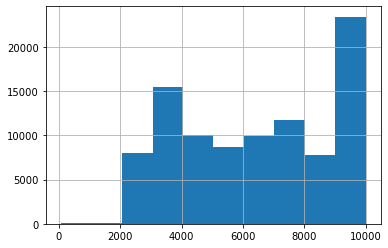

In [18]:
working_data['ZIP_edit'] = data['ZIP'].apply(lambda  x: int(x[0:4]) )

working_data['ZIP_edit'].hist(bins = 10)


<img src="zipcodes.png">

#### MAILCODE

In [19]:
working_data['MAILCODE'] = data['MAILCODE'].apply( lambda x: 1 if x == ' ' else 0)
working_data['MAILCODE']

0        1
1        1
2        1
3        1
4        1
        ..
95407    1
95408    1
95409    1
95410    1
95411    1
Name: MAILCODE, Length: 95412, dtype: int64

#### PVASTATE 

In [20]:
working_data['PVASTATE'].unique() # let's turn it into binary 


array([' ', 'P', 'E'], dtype=object)

In [21]:
working_data['PVASTATE'] = working_data['PVASTATE'].apply( lambda x: 0 if x == ' ' else 1)
working_data['PVASTATE']

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    0
95411    0
Name: PVASTATE, Length: 95412, dtype: int64

#### DOB 

In [22]:
working_data['DOB'] =  pd.to_datetime(working_data['DOB'], format='%Y-%m-%d')

In [23]:
working_data['born_day'] = working_data['ODATEDW'].apply(lambda x : x.day)
working_data['born_month'] = working_data['ODATEDW'].apply(lambda x : x.month)
working_data['born_year'] = working_data['ODATEDW'].apply(lambda x : x.year)


#### NOEXCH, RECINHSE, RECP3, RECPGVG, RECSWEEP - converted to binary

In [24]:
working_data.replace({'_':0,'X':1}, inplace = True)


In [25]:
working_data['NOEXCH']

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    0
95411    0
Name: NOEXCH, Length: 95412, dtype: object

#### MDMAUD 

In [26]:
working_data['MDMAUD_BIN'] = data['MDMAUD'].apply(lambda x : 0 if x == 'XXXX' else 1)
working_data['MDMAUD_BIN'].value_counts()

0    95118
1      294
Name: MDMAUD_BIN, dtype: int64

In [27]:
working_data['recency_giving'] = data['MDMAUD'].apply(lambda x : x[0])#.replace({'C':3,'L':2,'I':1,'D':0}))
working_data['recency_giving'].replace({'C':3,'L':2,'I':1,'D':0,'X':None}, inplace = True)
working_data['recency_giving']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
95407    NaN
95408    NaN
95409    NaN
95410    NaN
95411    3.0
Name: recency_giving, Length: 95412, dtype: float64

In [28]:
working_data['frequency_giving'] = data['MDMAUD'].apply(lambda x : int(x[1]) if x[1] != 'X' else None)#.replace({'C':3,'L':2,'I':1,'D':0}))
working_data['frequency_giving']


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
95407    NaN
95408    NaN
95409    NaN
95410    NaN
95411    1.0
Name: frequency_giving, Length: 95412, dtype: float64

In [29]:
working_data['amount_giving'] = data['MDMAUD'].apply(lambda x : x[2])
working_data['amount_giving'].replace({'L':1,'C':2,'M':3,'T':4,'X':None}, inplace = True)
working_data['amount_giving']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
95407    NaN
95408    NaN
95409    NaN
95410    NaN
95411    2.0
Name: amount_giving, Length: 95412, dtype: float64

#### DOMAIN

In [30]:
working_data.DOMAIN.value_counts()

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
       2316
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [31]:
working_data['urban_level'] = data.DOMAIN.apply(lambda x: x[0]).replace({'U':4,'C':3,'S':2,'T':1,'R':0,' ': None})
working_data['urban_level'] 

0        1.0
1        2.0
2        0.0
3        0.0
4        2.0
        ... 
95407    3.0
95408    3.0
95409    3.0
95410    3.0
95411    3.0
Name: urban_level, Length: 95412, dtype: float64

In [32]:
working_data['neighborhood_socioecon_status'] = data.DOMAIN.apply(lambda x: x[1] if x != ' ' else None)
working_data['neighborhood_socioecon_status']

0        2
1        1
2        2
3        2
4        2
        ..
95407    2
95408    1
95409    3
95410    1
95411    1
Name: neighborhood_socioecon_status, Length: 95412, dtype: object

#### HOMEOWNR

In [33]:
working_data['HOMEOWNR_BIN'] = data['HOMEOWNR'].replace({'H':1,'U':0,' ':None})
working_data['HOMEOWNR_BIN']

0        NaN
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
95407    NaN
95408    1.0
95409    NaN
95410    1.0
95411    0.0
Name: HOMEOWNR_BIN, Length: 95412, dtype: float64

#### CHILD03, CHILD07, CHILD12, CHILD18

In [34]:
working_data[['CHILD03_b','CHILD07_b','CHILD12_b','CHILD18_b']] = data[['CHILD03','CHILD07','CHILD12','CHILD18']].replace({' ':-1, 'M':0,'B':0.5,'F':1})

In [35]:
working_data[['CHILD03_b','CHILD07_b','CHILD12_b','CHILD18_b']]

,CHILD03_b,CHILD07_b,CHILD12_b,CHILD18_b
0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,0.0
2,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...
95407,-1.0,-1.0,-1.0,-1.0
95408,-1.0,-1.0,-1.0,0.0
95409,-1.0,-1.0,-1.0,-1.0
95410,-1.0,-1.0,-1.0,-1.0


#### NUMCHLD 

In [36]:
working_data.NUMCHLD.value_counts()

1.0    7792
2.0    3110
3.0    1101
4.0     316
5.0      59
6.0       7
7.0       1
Name: NUMCHLD, dtype: int64

In [37]:
working_data['CHILD_BIN'] = working_data.NUMCHLD.apply(lambda x: 1 if x>0 else 0)
working_data['CHILD_BIN'].value_counts()

0    83026
1    12386
Name: CHILD_BIN, dtype: int64

#### INCOME

In [38]:
working_data['INCOME'].value_counts()

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

#### WEALTH1

In [39]:
working_data['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

#### HIT 

In [40]:
working_data['HIT'].value_counts() # already in int , quantitative discrete, perfect. 

0     55672
1      8200
2      5622
3      3377
4      2820
      ...  
67        1
69        1
73        1
84        1
79        1
Name: HIT, Length: 75, dtype: int64

## other_mail_offers

In [41]:
other_mail_offers

['MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP']

In [42]:
data[other_mail_offers]

,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,9.0,0.0,4.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95408,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## MILITARY CONTEXT

In [43]:
working_data[military_context].GEOCODE.value_counts()

      80168
12     3914
03     3327
14     2017
05     1918
04     1622
02     1408
01     1038
Name: GEOCODE, dtype: int64

## LIFESTYLE INTERESTS

In [44]:
working_data[lifestyle_interests]['CATLG'].value_counts()

     87547
Y     7865
Name: CATLG, dtype: int64

In [45]:
# dropping columns with more than 80 % NAN

data_valid_columns = data.loc[:, data.isnull().mean() < .8]
data_valid_columns
print('we drop', data_valid_columns.shape[1] - data.shape[1])

we drop -33


In [46]:
# dropping columns with more than 50 % NAN

data_valid_columns = data.loc[:, data.isnull().mean() < .5]
data_valid_columns
print('we drop', data_valid_columns.shape[1] - data.shape[1])

we drop -62


In [47]:
# dropping columns with more than 30 % NAN

data_valid_columns = data.loc[:, data.isnull().mean() < .3]
data_valid_columns
print('we drop', data_valid_columns.shape[1] - data.shape[1])

we drop -69


In [48]:
"""fig, axes = plt.subplots(1,1, figsize=(10,10))

nan_percentage = np.arange(0.01, 1, 0.01).tolist()
columns_number = [data.loc[:, data.isnull().mean() < percentage ].shape[1] for percentage in nan_percentage]


sns.lineplot(x = nan_percentage, y = columns_number)"""

'fig, axes = plt.subplots(1,1, figsize=(10,10))\n\nnan_percentage = np.arange(0.01, 1, 0.01).tolist()\ncolumns_number = [data.loc[:, data.isnull().mean() < percentage ].shape[1] for percentage in nan_percentage]\n\n\nsns.lineplot(x = nan_percentage, y = columns_number)'

In [49]:
#nan_perc = (data.isnull().mean() * 100).sort_values(ascending=True)
#plt.boxplot(nan_perc, vert = False)

#nan_perc.describe()



In [50]:
#nan_perc

In [51]:
data.isnull().mean()

Unnamed: 0    0.000000
ODATEDW       0.000000
OSOURCE       0.000000
TCODE         0.000000
STATE         0.000000
                ...   
RFA_2A        0.000000
MDMAUD_R      0.000000
MDMAUD_F      0.000000
MDMAUD_A      0.000000
GEOCODE2      0.001383
Length: 476, dtype: float64

In [52]:
# dropping columns with more than 30 % NAN

#data_valid_columns = data.loc[:, data.isnull().mean() < 0.3]
#data_valid_columns
#print('we drop', data_valid_columns.shape[1] - data.shape[1])

In [53]:
#set(data.columns) - set(data_valid_columns.columns)

In [54]:
#data_valid_columns = data.loc[:, data.isnull().mean() == 0]
#data_valid_columns

# Exploring Demographics

In [55]:
hood_subgroups=['population', 'ethnicity', 'age', 'households', 'marriage', 'structure', 'home_value', 
'housing_units', 'families', 'renters', 'income', 'mobility', 'transportation', 
'labor_force', 'occupation', 'employment', 'employer', 'education', 'military', 
'ancestry', 'language', 'vehicles', 'home_structures']

hood_subgroups_dic= {'population': population,
'ethnicity': ethnicity,
'age': age,
'households': households,
'marriage': marriage,
'structure': structure,
'home_value': home_value,
'housing_units': housing_units,
'families': families,
'renters': renters,
'income': income,
'mobility': mobility,
'transportation': transportation,
'labor_force': labor_force,
'occupation': occupation,
'employment': employment,
'employer': employer,
'education': education,
'military': military,
'ancestry': ancestry,
'language': language,
'vehicles': vehicles,
'home_structures':home_structures}

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

standardized_data = working_data.copy()
standardized_data[neighbourhood]= scaler.fit_transform(working_data[neighbourhood])

In [57]:
standardized_data[neighbourhood]

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
0,0.010051,0.011108,0.009378,0.000000,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,...,0.000000,0.333333,0.656566,0.404040,1.000000,1.000000,0.285714,0.4,0.101010,0.070707
1,0.036585,0.039552,0.028190,1.000000,0.000000,0.000000,0.505051,0.505051,0.676768,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.952381,0.8,0.060606,0.050505
2,0.070931,0.085837,0.075389,0.000000,0.020202,0.989899,0.494949,0.515152,0.969697,0.020202,...,0.151515,0.222222,0.777778,0.171717,0.979798,0.929293,0.428571,0.4,0.060606,0.050505
3,0.006484,0.006732,0.006186,0.000000,0.080808,0.929293,0.545455,0.464646,0.616162,0.000000,...,0.161616,0.232323,0.777778,0.222222,0.939394,0.898990,0.761905,0.4,0.060606,0.060606
4,0.025532,0.026382,0.021495,1.000000,0.000000,0.000000,0.464646,0.545455,0.020202,0.989899,...,0.000000,1.000000,0.010101,0.212121,1.000000,0.969697,0.285714,0.4,0.070707,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.277403,0.305142,0.283507,1.000000,0.000000,0.000000,0.505051,0.505051,0.787879,0.101010,...,0.010101,0.939394,0.070707,0.989899,1.000000,0.989899,0.761905,0.8,0.040404,0.030303
95408,0.012705,0.013549,0.010197,0.969697,0.000000,0.040404,0.515152,0.494949,0.919192,0.030303,...,0.000000,0.696970,0.313131,0.676768,1.000000,0.979798,0.857143,1.0,0.030303,0.020202
95409,0.005593,0.005512,0.005790,1.000000,0.000000,0.000000,0.535354,0.474747,0.828283,0.141414,...,0.040404,1.000000,0.000000,1.000000,1.000000,1.000000,0.238095,0.4,0.030303,0.111111
95410,0.017690,0.018177,0.014349,1.000000,0.000000,0.000000,0.474747,0.535354,0.929293,0.010101,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.571429,0.6,0.060606,0.030303


In [58]:
pca_data = standardized_data[neighbourhood]

pca_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)


In [59]:
# Use PCA to reduce dimensionality of data
from sklearn.decomposition import PCA as PCA

pca = PCA()
pca_feat = pca.fit_transform(pca_data[income])
pca_feat  # What is this output?

array([[ 9.07815530e-03,  2.16502514e-02, -1.03555139e-01, ...,
         3.07046084e-03, -1.09500958e-03,  4.88818056e-03],
       [ 9.77002086e-01, -6.64601469e-02,  3.80769981e-01, ...,
        -7.20398851e-03,  2.31050197e-03, -5.25150868e-03],
       [-2.62959421e-01,  8.10404044e-02, -3.39069427e-02, ...,
        -9.63927951e-04, -2.61118171e-03, -1.45500278e-03],
       ...,
       [-1.64552252e-01, -2.70866587e-01, -1.03467828e-01, ...,
        -1.58892822e-04, -2.91867109e-03,  3.10688627e-03],
       [ 4.59347905e-01, -1.80368784e-01, -7.41794172e-02, ...,
         5.84873638e-03,  9.76379717e-03,  2.59052965e-04],
       [ 2.65977179e-01,  3.28057636e-01, -1.57015729e-01, ...,
         1.29286775e-04, -3.15172120e-03,  2.14928931e-03]])

In [60]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,0.136097,0.000000,0.484978,0.484978
2,0.039222,-0.096875,0.139766,0.624744
3,0.028702,-0.010520,0.102279,0.727023
4,0.024230,-0.004472,0.086344,0.813367
5,0.011173,-0.013058,0.039814,0.853181
6,0.007858,-0.003315,0.028002,0.881183
7,0.006087,-0.001772,0.021689,0.902872
8,0.005938,-0.000149,0.021160,0.924032
9,0.004781,-0.001157,0.017037,0.941069
10,0.003426,-0.001355,0.012210,0.953279


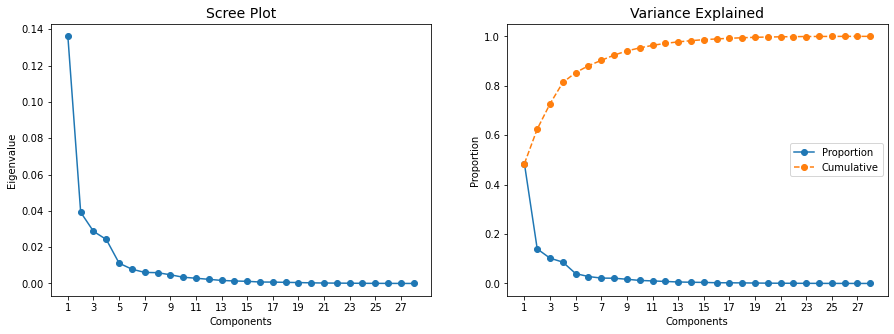

In [61]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [62]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(pca_data[income])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=pca_data[income].index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2,PC3,PC4
0,0.009078,0.021650,-0.103555,-0.224938,-0.104151
1,0.977002,-0.066460,0.380770,0.444299,-0.356997
2,-0.262959,0.081040,-0.033907,0.018411,-0.006103
3,-0.034374,-0.248392,-0.020667,0.227068,0.210540
4,-0.353342,-0.183770,-0.029680,0.009184,-0.199243
...,...,...,...,...,...
95407,0.404017,-0.193723,-0.013085,-0.016661,0.015506
95408,0.651865,0.138676,0.291164,0.429416,-0.210481
95409,-0.164552,-0.270867,-0.103468,0.167305,-0.045277
95410,0.459348,-0.180369,-0.074179,0.026177,0.140883


In [63]:
# Reassigning df to contain pca variables
df_pca = pd.concat([pca_data, pca_df], axis=1)
df_pca.head()

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC21,MHUC1,MHUC2,AC1,AC2,PC0,PC1,PC2,PC3,PC4
0,0.010051,0.011108,0.009378,0.0,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,...,1.000000,0.285714,0.4,0.101010,0.070707,0.009078,0.021650,-0.103555,-0.224938,-0.104151
1,0.036585,0.039552,0.028190,1.0,0.000000,0.000000,0.505051,0.505051,0.676768,0.000000,...,1.000000,0.952381,0.8,0.060606,0.050505,0.977002,-0.066460,0.380770,0.444299,-0.356997
2,0.070931,0.085837,0.075389,0.0,0.020202,0.989899,0.494949,0.515152,0.969697,0.020202,...,0.929293,0.428571,0.4,0.060606,0.050505,-0.262959,0.081040,-0.033907,0.018411,-0.006103
3,0.006484,0.006732,0.006186,0.0,0.080808,0.929293,0.545455,0.464646,0.616162,0.000000,...,0.898990,0.761905,0.4,0.060606,0.060606,-0.034374,-0.248392,-0.020667,0.227068,0.210540
4,0.025532,0.026382,0.021495,1.0,0.000000,0.000000,0.464646,0.545455,0.020202,0.989899,...,0.969697,0.285714,0.4,0.070707,0.111111,-0.353342,-0.183770,-0.029680,0.009184,-0.199243


In [64]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[income + pca_feat_names].corr().loc[income, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

,PC0,PC1,PC2,PC3,PC4
ADI,-0.420963,0.899893,-0.028219,0.106717,0.023624
IC1,0.920037,0.096854,0.116269,0.200818,-0.076853
IC2,0.913328,0.099899,0.217474,0.178111,-0.079552
IC3,0.936561,0.102512,0.164938,0.197967,-0.061476
IC4,0.923934,0.108649,0.242704,0.163690,-0.060755
IC5,0.765907,0.111067,0.397277,0.117825,-0.196140
IC6,-0.847715,-0.116652,0.385598,0.134711,0.182487
IC7,-0.669089,0.001765,0.049698,-0.311375,-0.320780
IC8,-0.306226,0.055594,-0.289125,-0.436389,-0.319729
IC9,0.295400,0.068175,-0.567804,-0.389819,0.118915


## Genearating heatmap figures

In [65]:
# for subgroup in hood_subgroups: 
#     title = subgroup
#     print(title)
#     plt.figure(figsize=(30,30))
#     plt.title(title)
#     sns.heatmap(data=standardized_data[hood_subgroups_dic[title]].corr(),
#                linewidths=.5,
#                annot= True)
#     destination = '../Graphs/0_Data_Preprocessing/demographics_pairplots/' + title +'.png'
#     plt.savefig(destination, dpi=300)

## Trying Clustering techniques
### K-Means

In [66]:
from sklearn.cluster import KMeans as KMeans

In [67]:
pca_data.head(n=5)

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
0,0.010051,0.011108,0.009378,0.0,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,...,0.000000,0.333333,0.656566,0.404040,1.000000,1.000000,0.285714,0.4,0.101010,0.070707
1,0.036585,0.039552,0.028190,1.0,0.000000,0.000000,0.505051,0.505051,0.676768,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.952381,0.8,0.060606,0.050505
2,0.070931,0.085837,0.075389,0.0,0.020202,0.989899,0.494949,0.515152,0.969697,0.020202,...,0.151515,0.222222,0.777778,0.171717,0.979798,0.929293,0.428571,0.4,0.060606,0.050505
3,0.006484,0.006732,0.006186,0.0,0.080808,0.929293,0.545455,0.464646,0.616162,0.000000,...,0.161616,0.232323,0.777778,0.222222,0.939394,0.898990,0.761905,0.4,0.060606,0.060606
4,0.025532,0.026382,0.021495,1.0,0.000000,0.000000,0.464646,0.545455,0.020202,0.989899,...,0.000000,1.000000,0.010101,0.212121,1.000000,0.969697,0.285714,0.4,0.070707,0.111111


In [68]:
def test_best_KMeans(data, min_nr_clusters, max_nr_clusters):
    inertia = {}

    for nr_clusters in range(min_nr_clusters, max_nr_clusters + 1):
        print("current n.clusters: %d" % nr_clusters)

        kmeans = KMeans(
            init="random",
            n_clusters = nr_clusters,
            max_iter = 300,
            random_state = 42
        )

        kmeans.fit(data)
        inertia.update({nr_clusters:kmeans.inertia_})

        print("%d: %1.4f" % (nr_clusters, kmeans.inertia_))
    
    return inertia

In [69]:
#k_means_inertia = test_best_KMeans(pca_data, 1, 15)

In [70]:
"""sns.lineplot(
    x=list(k_means_inertia.keys()), 
    y=list(k_means_inertia.values()),
    marker='o'
)

plt.show()"""

"sns.lineplot(\n    x=list(k_means_inertia.keys()), \n    y=list(k_means_inertia.values()),\n    marker='o'\n)\n\nplt.show()"

    Defined nr clusters: 5

In [71]:
pca_data = standardized_data[neighbourhood]
# 
pca_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
pca_data

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
0,0.010051,0.011108,0.009378,0.000000,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,...,0.000000,0.333333,0.656566,0.404040,1.000000,1.000000,0.285714,0.4,0.101010,0.070707
1,0.036585,0.039552,0.028190,1.000000,0.000000,0.000000,0.505051,0.505051,0.676768,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.952381,0.8,0.060606,0.050505
2,0.070931,0.085837,0.075389,0.000000,0.020202,0.989899,0.494949,0.515152,0.969697,0.020202,...,0.151515,0.222222,0.777778,0.171717,0.979798,0.929293,0.428571,0.4,0.060606,0.050505
3,0.006484,0.006732,0.006186,0.000000,0.080808,0.929293,0.545455,0.464646,0.616162,0.000000,...,0.161616,0.232323,0.777778,0.222222,0.939394,0.898990,0.761905,0.4,0.060606,0.060606
4,0.025532,0.026382,0.021495,1.000000,0.000000,0.000000,0.464646,0.545455,0.020202,0.989899,...,0.000000,1.000000,0.010101,0.212121,1.000000,0.969697,0.285714,0.4,0.070707,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.277403,0.305142,0.283507,1.000000,0.000000,0.000000,0.505051,0.505051,0.787879,0.101010,...,0.010101,0.939394,0.070707,0.989899,1.000000,0.989899,0.761905,0.8,0.040404,0.030303
95408,0.012705,0.013549,0.010197,0.969697,0.000000,0.040404,0.515152,0.494949,0.919192,0.030303,...,0.000000,0.696970,0.313131,0.676768,1.000000,0.979798,0.857143,1.0,0.030303,0.020202
95409,0.005593,0.005512,0.005790,1.000000,0.000000,0.000000,0.535354,0.474747,0.828283,0.141414,...,0.040404,1.000000,0.000000,1.000000,1.000000,1.000000,0.238095,0.4,0.030303,0.111111
95410,0.017690,0.018177,0.014349,1.000000,0.000000,0.000000,0.474747,0.535354,0.929293,0.010101,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.571429,0.6,0.060606,0.030303


In [72]:
kmeans = KMeans(
            init="random",
            n_clusters = 5,
            max_iter = 300,
            random_state = 42
        )

kmeans.fit(pca_data)

KMeans(init='random', n_clusters=5, random_state=42)

In [73]:
pca_data['clusters'] = kmeans.predict(pca_data)
pca_data['clusters']

0        2
1        4
2        2
3        2
4        3
        ..
95407    1
95408    1
95409    3
95410    4
95411    1
Name: clusters, Length: 95280, dtype: int32

In [74]:
dummies = pd.get_dummies(pca_data['clusters'], prefix='cluster_')
dummies

,cluster__0,cluster__1,cluster__2,cluster__3,cluster__4
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
95407,0,1,0,0,0
95408,0,1,0,0,0
95409,0,0,0,1,0
95410,0,0,0,0,1


In [75]:
pca_data = pd.concat([pca_data,dummies], axis=1)
pca_data.drop(columns='clusters', inplace=True)

In [76]:
pca_data.head()

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC21,MHUC1,MHUC2,AC1,AC2,cluster__0,cluster__1,cluster__2,cluster__3,cluster__4
0,0.010051,0.011108,0.009378,0.0,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,...,1.000000,0.285714,0.4,0.101010,0.070707,0,0,1,0,0
1,0.036585,0.039552,0.028190,1.0,0.000000,0.000000,0.505051,0.505051,0.676768,0.000000,...,1.000000,0.952381,0.8,0.060606,0.050505,0,0,0,0,1
2,0.070931,0.085837,0.075389,0.0,0.020202,0.989899,0.494949,0.515152,0.969697,0.020202,...,0.929293,0.428571,0.4,0.060606,0.050505,0,0,1,0,0
3,0.006484,0.006732,0.006186,0.0,0.080808,0.929293,0.545455,0.464646,0.616162,0.000000,...,0.898990,0.761905,0.4,0.060606,0.060606,0,0,1,0,0
4,0.025532,0.026382,0.021495,1.0,0.000000,0.000000,0.464646,0.545455,0.020202,0.989899,...,0.969697,0.285714,0.4,0.070707,0.111111,0,0,0,1,0


In [77]:
correlations = pca_data.corr()[['cluster__0','cluster__1','cluster__2','cluster__3','cluster__4']]
correlations

,cluster__0,cluster__1,cluster__2,cluster__3,cluster__4
POP901,0.029595,0.033954,0.023413,-0.065043,-0.018688
POP902,-0.001672,0.051363,0.043505,-0.075654,-0.021094
POP903,0.074555,0.017119,0.013890,-0.064979,-0.030506
POP90C1,0.302812,0.220861,-0.678340,-0.011412,0.297930
POP90C2,-0.138706,-0.048649,-0.076916,0.354701,-0.148563
...,...,...,...,...,...
cluster__0,1.000000,-0.213700,-0.227570,-0.223728,-0.158745
cluster__1,-0.213700,1.000000,-0.315934,-0.310600,-0.220385
cluster__2,-0.227570,-0.315934,1.000000,-0.330758,-0.234688
cluster__3,-0.223728,-0.310600,-0.330758,1.000000,-0.230726


In [78]:
correlations

,cluster__0,cluster__1,cluster__2,cluster__3,cluster__4
POP901,0.029595,0.033954,0.023413,-0.065043,-0.018688
POP902,-0.001672,0.051363,0.043505,-0.075654,-0.021094
POP903,0.074555,0.017119,0.013890,-0.064979,-0.030506
POP90C1,0.302812,0.220861,-0.678340,-0.011412,0.297930
POP90C2,-0.138706,-0.048649,-0.076916,0.354701,-0.148563
...,...,...,...,...,...
cluster__0,1.000000,-0.213700,-0.227570,-0.223728,-0.158745
cluster__1,-0.213700,1.000000,-0.315934,-0.310600,-0.220385
cluster__2,-0.227570,-0.315934,1.000000,-0.330758,-0.234688
cluster__3,-0.223728,-0.310600,-0.330758,1.000000,-0.230726


In [79]:
    correlations = correlations.mask(np.absolute(correlations) < 0.5)

In [80]:
plt.figure(figsize=(200,200))
sns.heatmap(correlations)
plt.show()

### DBSCAN

In [81]:
pca_data = standardized_data[neighbourhood]

pca_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
pca_data

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
0,0.010051,0.011108,0.009378,0.000000,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,...,0.000000,0.333333,0.656566,0.404040,1.000000,1.000000,0.285714,0.4,0.101010,0.070707
1,0.036585,0.039552,0.028190,1.000000,0.000000,0.000000,0.505051,0.505051,0.676768,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.952381,0.8,0.060606,0.050505
2,0.070931,0.085837,0.075389,0.000000,0.020202,0.989899,0.494949,0.515152,0.969697,0.020202,...,0.151515,0.222222,0.777778,0.171717,0.979798,0.929293,0.428571,0.4,0.060606,0.050505
3,0.006484,0.006732,0.006186,0.000000,0.080808,0.929293,0.545455,0.464646,0.616162,0.000000,...,0.161616,0.232323,0.777778,0.222222,0.939394,0.898990,0.761905,0.4,0.060606,0.060606
4,0.025532,0.026382,0.021495,1.000000,0.000000,0.000000,0.464646,0.545455,0.020202,0.989899,...,0.000000,1.000000,0.010101,0.212121,1.000000,0.969697,0.285714,0.4,0.070707,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.277403,0.305142,0.283507,1.000000,0.000000,0.000000,0.505051,0.505051,0.787879,0.101010,...,0.010101,0.939394,0.070707,0.989899,1.000000,0.989899,0.761905,0.8,0.040404,0.030303
95408,0.012705,0.013549,0.010197,0.969697,0.000000,0.040404,0.515152,0.494949,0.919192,0.030303,...,0.000000,0.696970,0.313131,0.676768,1.000000,0.979798,0.857143,1.0,0.030303,0.020202
95409,0.005593,0.005512,0.005790,1.000000,0.000000,0.000000,0.535354,0.474747,0.828283,0.141414,...,0.040404,1.000000,0.000000,1.000000,1.000000,1.000000,0.238095,0.4,0.030303,0.111111
95410,0.017690,0.018177,0.014349,1.000000,0.000000,0.000000,0.474747,0.535354,0.929293,0.010101,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.571429,0.6,0.060606,0.030303


In [82]:
# class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

from sklearn.cluster import DBSCAN

In [83]:
model = DBSCAN(eps=100, min_samples=2, n_jobs=4)

In [84]:
pca_data

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
0,0.010051,0.011108,0.009378,0.000000,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,...,0.000000,0.333333,0.656566,0.404040,1.000000,1.000000,0.285714,0.4,0.101010,0.070707
1,0.036585,0.039552,0.028190,1.000000,0.000000,0.000000,0.505051,0.505051,0.676768,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.952381,0.8,0.060606,0.050505
2,0.070931,0.085837,0.075389,0.000000,0.020202,0.989899,0.494949,0.515152,0.969697,0.020202,...,0.151515,0.222222,0.777778,0.171717,0.979798,0.929293,0.428571,0.4,0.060606,0.050505
3,0.006484,0.006732,0.006186,0.000000,0.080808,0.929293,0.545455,0.464646,0.616162,0.000000,...,0.161616,0.232323,0.777778,0.222222,0.939394,0.898990,0.761905,0.4,0.060606,0.060606
4,0.025532,0.026382,0.021495,1.000000,0.000000,0.000000,0.464646,0.545455,0.020202,0.989899,...,0.000000,1.000000,0.010101,0.212121,1.000000,0.969697,0.285714,0.4,0.070707,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.277403,0.305142,0.283507,1.000000,0.000000,0.000000,0.505051,0.505051,0.787879,0.101010,...,0.010101,0.939394,0.070707,0.989899,1.000000,0.989899,0.761905,0.8,0.040404,0.030303
95408,0.012705,0.013549,0.010197,0.969697,0.000000,0.040404,0.515152,0.494949,0.919192,0.030303,...,0.000000,0.696970,0.313131,0.676768,1.000000,0.979798,0.857143,1.0,0.030303,0.020202
95409,0.005593,0.005512,0.005790,1.000000,0.000000,0.000000,0.535354,0.474747,0.828283,0.141414,...,0.040404,1.000000,0.000000,1.000000,1.000000,1.000000,0.238095,0.4,0.030303,0.111111
95410,0.017690,0.018177,0.014349,1.000000,0.000000,0.000000,0.474747,0.535354,0.929293,0.010101,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.571429,0.6,0.060606,0.030303


In [85]:
model.fit(pca_data)

MemoryError: 

In [ ]:
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

## Reducing Neighborhood columns using PCA

In [91]:
#sub-groups
list(hood_subgroups_dic.keys())

['population',
 'ethnicity',
 'age',
 'households',
 'marriage',
 'structure',
 'home_value',
 'housing_units',
 'families',
 'renters',
 'income',
 'mobility',
 'transportation',
 'labor_force',
 'occupation',
 'employment',
 'employer',
 'education',
 'military',
 'ancestry',
 'language',
 'vehicles',
 'home_structures']

In [ ]:

def plot_cumulative_significance_PCA(pca):
    """Takes the PCA model after fit and transform, plotting the cumulative significance of each component"""
    
    # figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # draw plots
    ax1.plot(pca.explained_variance_, marker=".", markersize=12)
    ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
    ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

    # customizations
    ax2.legend()
    ax1.set_title("Scree Plot", fontsize=14)
    ax2.set_title("Variance Explained", fontsize=14)
    ax1.set_ylabel("Eigenvalue")
    ax2.set_ylabel("Proportion")
    ax1.set_xlabel("Components")
    ax2.set_xlabel("Components")
    ax1.set_xticks(range(0, pca.n_components_, 2))
    ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
    ax2.set_xticks(range(0, pca.n_components_, 2))
    ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

    plt.show()

In [ ]:
for subGroup in hood_subgroups.keys():
    columns = hood_subgroups[subGroup]

    pca = PCA()
    pca.fit_transform(pca_data[columns])
    plot_cumulative_significance_PCA(pca)